<AxesSubplot:xlabel='t', ylabel='X'>

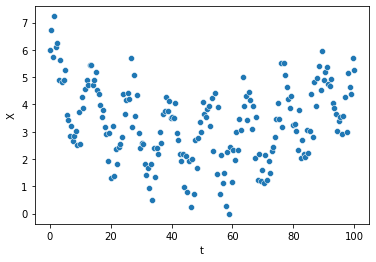

In [79]:
#Q4(1)-------------------------------------------------------
import pandas as pd
import seaborn as sn
import math
from sklearn.linear_model import LinearRegression
from statsmodels.graphics.tsaplots import plot_acf

df=pd.read_csv('C:/Users/Chenyi/Desktop/TS/HW1_problem4.csv')
sn.scatterplot(data=df,x='t',y='X')

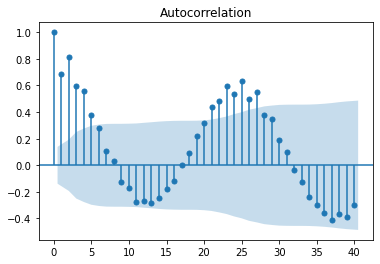

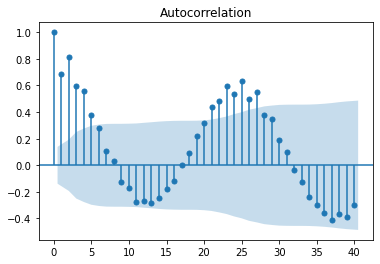

In [80]:
plot_acf(df.X, lags=200*0.2)

<AxesSubplot:xlabel='t', ylabel='X'>

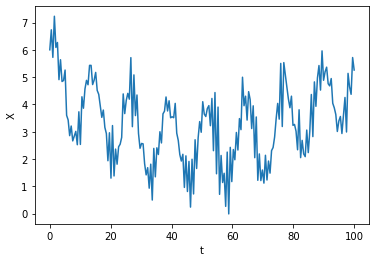

In [81]:
sn.lineplot(data=df,x='t',y='X')

In [82]:
#Q4(2)-------------------------------------------------------
df['t2']=df['t'].apply(lambda x:x*x)
df['cos']=df['t'].apply(lambda x: math.cos(12*x))
df['sin']=df['t'].apply(lambda x: math.sin(12*x))
df

,t,X,t2,cos,sin
0,0.000000,6.000000,0.000000,1.000000,0.000000
1,0.502513,6.732033,0.252519,0.968157,-0.250343
2,1.005025,5.722897,1.010076,0.874657,-0.484743
3,1.507538,7.229304,2.272670,0.725453,-0.688271
4,2.010050,6.086973,4.040302,0.530049,-0.847967
...,...,...,...,...,...
195,97.989950,5.136333,9602.030252,0.602837,0.797865
196,98.492462,4.639536,9700.765132,0.783381,0.621542
197,98.994975,4.369355,9800.005050,0.914034,0.405637
198,99.497487,5.716752,9899.750006,0.986477,0.163898


In [83]:
X=df[['t','t2','cos','sin']].values
reg = LinearRegression().fit(X, df.X)
print(reg.coef_)
print(reg.intercept_)

[-9.99631851e-02  9.98102346e-04  7.99462944e-01 -1.15540097e+00]
4.995251074641903


<AxesSubplot:xlabel='t', ylabel='res'>

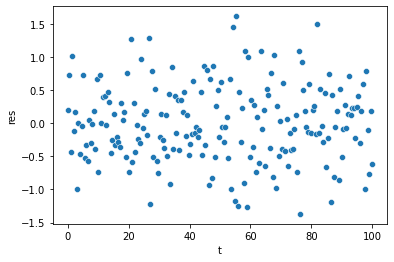

In [84]:
y=df.X-reg.predict(X)
df['res']=y
sn.scatterplot(data=df,x='t',y='res')

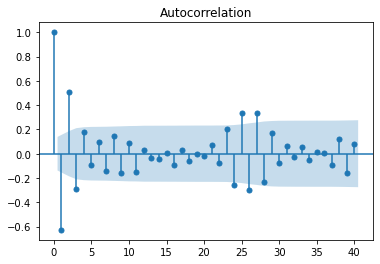

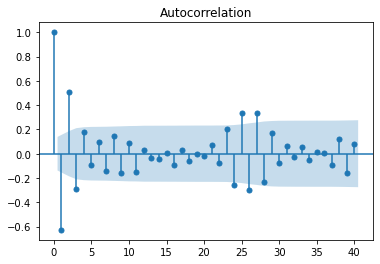

In [85]:
plot_acf(df.res, lags=200*0.2)

<AxesSubplot:xlabel='t', ylabel='res'>

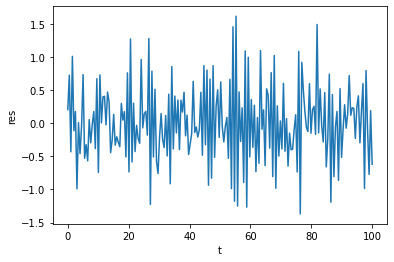

In [86]:
sn.lineplot(data=df,x='t',y='res')

In [87]:
#Q4(3)-------------------------------------------------------
Y=df.res[1:199]
Y_lag1=df.res[0:198].values
reg = LinearRegression(fit_intercept=False).fit(Y_lag1.reshape(-1, 1), Y)
print(reg.coef_)

[-0.62966272]


In [88]:
#Q4(4)-------------------------------------------------------
res=Y-reg.predict(Y_lag1.reshape(-1, 1))
res2=res**2
print(sum(res2)/(len(Y)-2))

0.2058178081282678


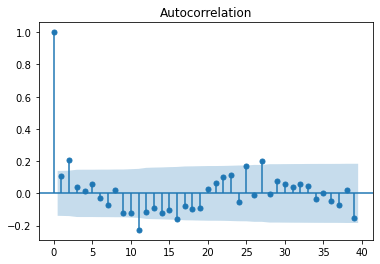

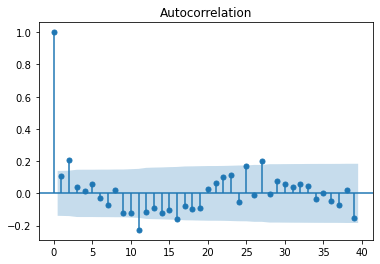

In [89]:
#Q4(5)-------------------------------------------------------
plot_acf(res, lags=199*0.2)